# Imports

In [1]:
import museval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
accuracy = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_list = []
accuracies_list = []
for n in names:
    sdrs = []
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_drop/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs.append(results.agg_frames_tracks_scores()['drums']['SDR'])

    sdrs_list.append(sdrs)
    accuracies_list.append(accuracy)


accuracy  = [100 * a for a in accuracy]
plt_acc = accuracy


# Creating a DataFrame for plotting
data_acc = {
    'Accuracy (%)': accuracy * len(names),
    'SDR': sdrs_list[0] + sdrs_list[1] + sdrs_list[2],
    'Model': ['conv-tasnet'] * len(accuracy) + ['hdemucs'] * len(accuracy) + ['htdemucs'] * len(accuracy)
}
data_acc = pd.DataFrame(data_acc)



In [3]:
accuracy = [1.0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_initial = []

for n in names:
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_drop/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs_initial.append(results.agg_frames_tracks_scores()['drums']['SDR'])

accuracy = [0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_list = []
accuracies_list = []
for idx, n in enumerate(names):
    sdrs = [sdrs_initial[idx]]
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_fpr/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs.append(results.agg_frames_tracks_scores()['drums']['SDR'])

    sdrs_list.append(sdrs)
    accuracies_list.append(accuracy)
accuracy = [0] + accuracy

fpr_accuracy_converted  = [100 * (1 - (1 / (1 + a))) for a in accuracy]

# Creating a DataFrame for plotting
data_fpr = {
    'False Positive Rate (%)': fpr_accuracy_converted * len(names),
    'SDR': sdrs_list[0] + sdrs_list[1] + sdrs_list[2],
    'Model': ['conv-tasnet'] * len(fpr_accuracy_converted) + ['hdemucs'] * len(fpr_accuracy_converted) + ['htdemucs'] * len(fpr_accuracy_converted)
}
df_fpr = pd.DataFrame(data_fpr)

In [4]:
accuracy = [1.0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_initial = []

for n in names:
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_drop/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs_initial.append(results.agg_frames_tracks_scores()['drums']['SDR'])

accuracy = [0.010, 0.025, 0.05, 0.1]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_list = []
accuracies_list = []
for idx, n in enumerate(names):
    sdrs = [sdrs_initial[idx]]
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_time/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs.append(results.agg_frames_tracks_scores()['drums']['SDR'])

    sdrs_list.append(sdrs)
    accuracies_list.append([0] + accuracy)


# Creating a DataFrame for plotting
data_time_shift = {
    'Time Shift': accuracies_list[0] * len(names),
    'SDR': sdrs_list[0] + sdrs_list[1] + sdrs_list[2],
    'Model': ['conv-tasnet'] * len(accuracies_list[0]) + ['hdemucs'] * len(accuracies_list[1]) + ['htdemucs'] * len(accuracies_list[2])
}
df_time_shift = pd.DataFrame(data_time_shift)



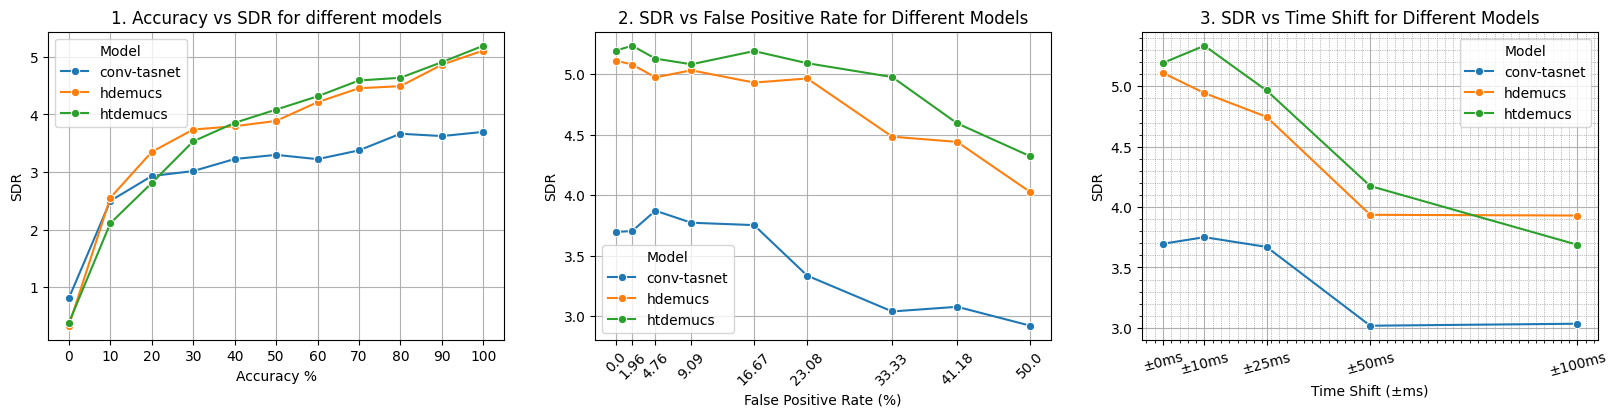

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.lineplot(data=data_acc, x='Accuracy (%)', y='SDR', hue='Model', marker='o', ax=axs[0])

axs[0].set_xlabel('Accuracy %')
axs[0].set_ylabel('SDR')
axs[0].set_title('1. Accuracy vs SDR for different models')
axs[0].grid(True)
axs[0].set_xticks(plt_acc)
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

sns.lineplot(data=df_fpr, x='False Positive Rate (%)', y='SDR', hue='Model', marker='o', ax=axs[1])
axs[1].set_xlabel('False Positive Rate (%)')
axs[1].set_ylabel('SDR')
axs[1].set_title('2. SDR vs False Positive Rate for Different Models')
axs[1].grid(True)
axs[1].set_xticks(fpr_accuracy_converted)
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
fpr_labels = [round(x, 2) for x in fpr_accuracy_converted]
axs[1].set_xticklabels(fpr_labels, rotation=45)

sns.lineplot(data=df_time_shift, x='Time Shift', y='SDR', hue='Model', marker='o', ax=axs[2])
axs[2].set_xlabel('Time Shift (±ms)')
axs[2].set_ylabel('SDR')
axs[2].set_title('3. SDR vs Time Shift for Different Models')
axs[2].grid(True)
axs[2].set_xticks(accuracies_list[0], [f'±{int(a*1000)}ms' for a in accuracies_list[0]], rotation=15)
axs[2].minorticks_on()
axs[2].grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
# axs[1].set_xticklabels(fpr_labels
